In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display basic stats and structure
print(df.head())
print(df.info())
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

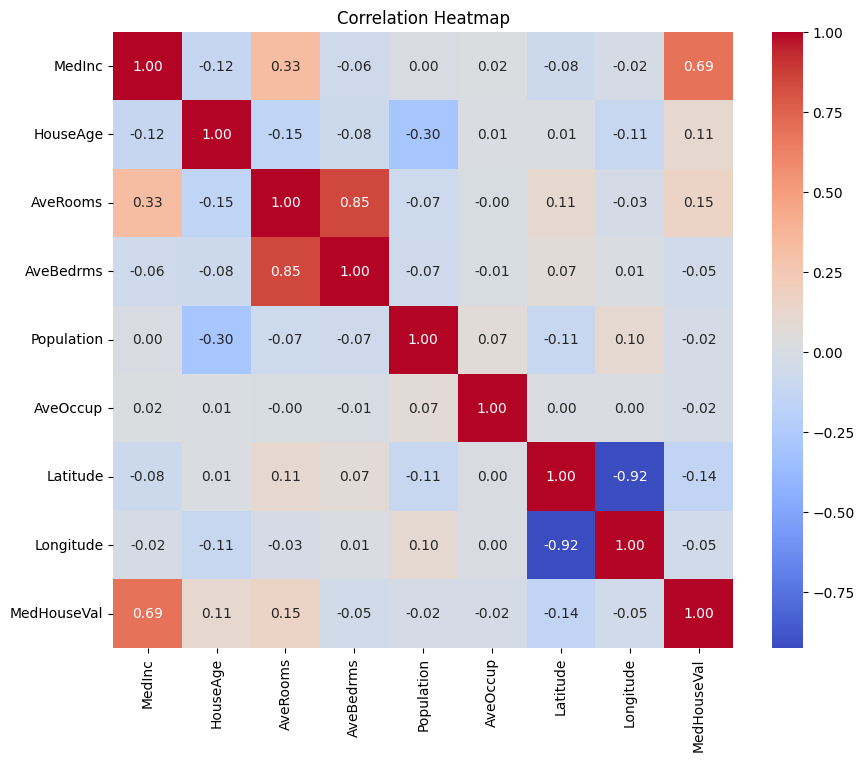

In [3]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


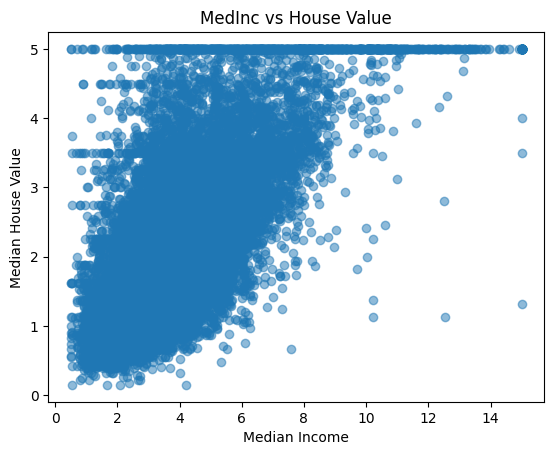

In [4]:
# scatter plot: MedInc vs Target
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('MedInc vs House Value')
plt.show()


In [5]:
# Feature matrix and target vector
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Output coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", pd.Series(lr.coef_, index=X.columns))

# Performance metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: -37.023277706064064
Coefficients: MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64
R² Score: 0.5757877060324511
MAE: 0.5332001304956558
MSE: 0.555891598695244
RMSE: 0.7455813830127761


In [6]:
correlation = df.corr()['MedHouseVal'].drop('MedHouseVal')
top_features = correlation.abs().sort_values(ascending=False).head(4).index
print("Top correlated features:", list(top_features))


Top correlated features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']


In [7]:
# Selecting top features
X_top = df[top_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain Linear Regression
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
y_pred2 = lr2.predict(X_test_scaled)

# New performance metrics
print("\nImproved Model:")
print("R² Score:", r2_score(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))



Improved Model:
R² Score: 0.5043169272470043
MAE: 0.599391354862759
MSE: 0.6495475488975627
RMSE: 0.8059451277212133
